In [1]:
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import calculate_log as callog
import torch
import copy


%matplotlib inline

In [2]:
class opt:
    outf = 'extracted_features'
    backbone_name = 'resnet18_vanilla_simclr_svhn'
    dataset ='svhn'
    fet = '_mean'
    aug = ''

In [3]:
ood_dataset=['cifar10','lsun_resize','imagenet_resize','lsun_fix','imagenet_fix'] 
# ood_dataset = ['cifa r10']
out_dataset=ood_dataset
num_out_datasets = len(ood_dataset)

In [4]:
ind_dataset='svhn'
experiment = opt.backbone_name
ae_type = 'vanilla_AE'
prefix = 'confidence' #confidence
mix = 'sum'

layer_num=9
epoch=1000

#augs = ['', '_cjitter', '_gray', '_hflip']
#augs = ['_cjitter', '_gray', '_hflip']
augs = ['']
#augs = ['', '_hflip']

In [5]:
if mix == 'sum':
    for idx, aug in enumerate(augs):
        if idx == 0:
            ind=[]
            ind_train=[]
            ood=dict()
            for i in range(layer_num):
                ood[i]=[]
                #print(os.path.join('trained_autoencoders',ae_type,experiment,'{}_layer_{}_in_{}_epoch_{}{}{}.txt'.format(prefix, i,ind_dataset,epoch, opt.fet, aug)))
                ind.append(np.loadtxt(os.path.join('trained_autoencoders',ae_type,experiment,'{}_layer_{}_in_{}_epoch_{}{}{}.txt'.format(prefix, i,ind_dataset,epoch, opt.fet, aug))))
                ind_train.append(np.loadtxt(os.path.join('trained_autoencoders',ae_type,experiment,'{}_layer_{}_in_{}_epoch_{}{}_train{}.txt'.format(prefix, i,ind_dataset,epoch, opt.fet, aug))))
                for j in range(len(ood_dataset)):
                    ood[i].append(np.loadtxt(os.path.join('trained_autoencoders',ae_type,experiment,'{}_layer_{}_out_{}_epoch_{}{}_model1{}.txt'.format(prefix, i,ood_dataset[j],epoch, opt.fet, aug))))
                    #print(os.path.join('trained_autoencoders',ae_type,experiment,'{}_layer_{}_out_{}_epoch_{}{}_model1{}.txt'.format(prefix, i,ood_dataset[j],epoch, opt.fet, aug)))
        else:
            for i in range(layer_num):
                ind[i] += np.loadtxt(os.path.join('trained_autoencoders',ae_type,experiment,'{}_layer_{}_in_{}_epoch_{}{}{}.txt'.format(prefix, i,ind_dataset,epoch, opt.fet, aug)))
                ind_train[i] += np.loadtxt(os.path.join('trained_autoencoders',ae_type,experiment,'{}_layer_{}_in_{}_epoch_{}{}_train{}.txt'.format(prefix, i,ind_dataset,epoch, opt.fet, aug)))
                for j in range(len(ood_dataset)):
                    ood[i][j] += np.loadtxt(os.path.join('trained_autoencoders',ae_type,experiment,'{}_layer_{}_out_{}_epoch_{}{}_model1{}.txt'.format(prefix, i,ood_dataset[j],epoch, opt.fet, aug)))
elif mix == 'min':
    ind=[]
    ind_train=[]
    ood=dict()
    for i in range(layer_num):
        ind_aug = []
        ind_train_aug = []
        for aug in augs:
            ind_aug.append(np.expand_dims(np.loadtxt(os.path.join('trained_autoencoders',ae_type,experiment,'{}_layer_{}_in_{}_epoch_{}{}{}.txt'.format(prefix, i,ind_dataset,epoch, opt.fet, aug))), 1))
            ind_train_aug.append(np.expand_dims(np.loadtxt(os.path.join('trained_autoencoders',ae_type,experiment,'{}_layer_{}_in_{}_epoch_{}{}_train{}.txt'.format(prefix, i,ind_dataset,epoch, opt.fet, aug))), 1))
        ind_aug = np.concatenate(ind_aug, 1)
        ind_train_aug = np.concatenate(ind_train_aug, 1)
        ind.append(np.max(ind_aug, 1))
        ind_train.append(np.max(ind_train_aug, 1))
        
        ood[i]=[]
        for j in range(len(ood_dataset)):
            ood_aug = []
            for aug in augs:
                ood_aug.append(np.expand_dims(np.loadtxt(os.path.join('trained_autoencoders',ae_type,experiment,'{}_layer_{}_out_{}_epoch_{}{}_model1{}.txt'.format(prefix, i,ood_dataset[j],epoch, opt.fet, aug))), 1))
            ood_aug = np.concatenate(ood_aug, 1)
            ood[i].append(np.max(ood_aug, 1))
            
elif mix == 'max':
    ind=[]
    ind_train=[]
    ood=dict()
    for i in range(layer_num):
        ind_aug = []
        ind_train_aug = []
        for aug in augs:
            ind_aug.append(np.expand_dims(np.loadtxt(os.path.join('trained_autoencoders',ae_type,experiment,'{}_layer_{}_in_{}_epoch_{}{}{}.txt'.format(prefix, i,ind_dataset,epoch, opt.fet, aug))), 1))
            ind_train_aug.append(np.expand_dims(np.loadtxt(os.path.join('trained_autoencoders',ae_type,experiment,'{}_layer_{}_in_{}_epoch_{}{}_train{}.txt'.format(prefix, i,ind_dataset,epoch, opt.fet, aug))), 1))
        ind_aug = np.concatenate(ind_aug, 1)
        ind_train_aug = np.concatenate(ind_train_aug, 1)
        ind.append(np.min(ind_aug, 1))
        ind_train.append(np.min(ind_train_aug, 1))
        
        ood[i]=[]
        for j in range(len(ood_dataset)):
            ood_aug = []
            for aug in augs:
                ood_aug.append(np.expand_dims(np.loadtxt(os.path.join('trained_autoencoders',ae_type,experiment,'{}_layer_{}_out_{}_epoch_{}{}_model1{}.txt'.format(prefix, i,ood_dataset[j],epoch, opt.fet, aug))), 1))
            ood_aug = np.concatenate(ood_aug, 1)
            ood[i].append(np.min(ood_aug, 1))



{'TMP': {'TNR': 0.9822, 'AUROC': 0.9950917985556238, 'DTACC': 0.971251044867855, 'AUIN': 0.9981087364394164, 'AUOUT': 0.9864084577901348}}
{'TMP': {'TNR': 0.9997, 'AUROC': 0.9997227527658267, 'DTACC': 0.9941847879532881, 'AUIN': 0.9998826549054184, 'AUOUT': 0.998926828382691}}
{'TMP': {'TNR': 0.9999, 'AUROC': 0.9998375422556852, 'DTACC': 0.9959643515673017, 'AUIN': 0.9999209106597368, 'AUOUT': 0.9994966246048699}}
{'TMP': {'TNR': 0.9999, 'AUROC': 0.9999771742470805, 'DTACC': 0.9983277504609711, 'AUIN': 0.999971733259461, 'AUOUT': 0.9998980058873383}}
{'TMP': {'TNR': 0.9997, 'AUROC': 0.9999357521511986, 'DTACC': 0.9984237861094037, 'AUIN': 0.9999525095853291, 'AUOUT': 0.9998358187038792}}
{'TMP': {'TNR': 0.9993, 'AUROC': 0.999782229563614, 'DTACC': 0.9949808236017209, 'AUIN': 0.9998929373352322, 'AUOUT': 0.9994621591699026}}
{'TMP': {'TNR': 0.9978, 'AUROC': 0.9994135909649663, 'DTACC': 0.9911582667486172, 'AUIN': 0.9997375345534837, 'AUOUT': 0.9987124176874815}}
{'TMP': {'TNR': 0.9746, 

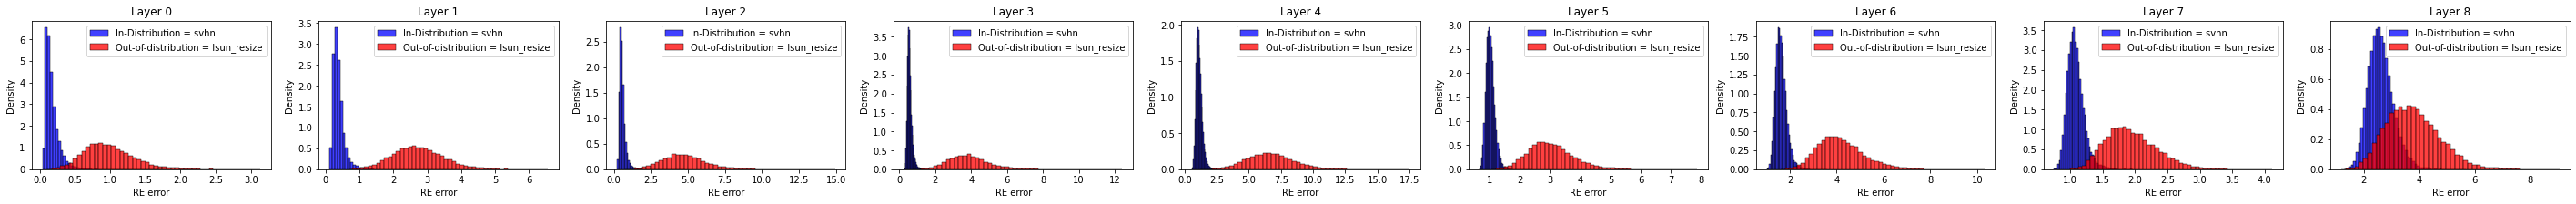

In [6]:
ood_index=1
fig,axs=plt.subplots(1,layer_num,figsize=(50,3))
results=dict()
for layer in range(layer_num):
    #ind_temp = copy.deepcopy(ind[layer])
    #ood_temp = copy.deepcopy(ood[layer][ood_index])
    #results[layer],_,_=callog.metric(ind_temp,ood_temp)
    
    results[layer],_,_ = callog.metric(ind[layer],ood[layer][ood_index])
    print(results[layer])
    sns.histplot(ax=axs[layer],data=-ind[layer],color='blue',stat='density',bins=50)
    sns.histplot(ax=axs[layer],data=-ood[layer][ood_index],color='red',stat='density',bins=50)
    axs[layer].legend(['In-Distribution = {}'.format(ind_dataset),'Out-of-distribution = {}'.format(ood_dataset[ood_index])])
    axs[layer].set_title('Layer '+str(layer))
    axs[layer].set_xlabel('RE error')

In [7]:
from sklearn.preprocessing import StandardScaler
ind_scaled=[]
ood_scaled=dict()
for j in range(len(ood_dataset)):
    ood_scaled[j]=[]

for i in range(layer_num):
    scaler=StandardScaler()
    scaler.fit(ind_train[i].reshape(-1,1))
    ind_scaled.append(scaler.transform(ind[i].reshape(-1,1)).reshape(-1))
    for j in range(len(ood_dataset)):
        ood_scaled[j].append(scaler.transform(ood[i][j].reshape(-1,1)).reshape(-1))

In [8]:
ind_scaled_max=np.min(ind_scaled,0)
ood_scaled_max=[]
for j in range(len(ood_dataset)):
    ood_scaled_max.append(np.min(ood_scaled[j],0))

cifar10
{'TMP': {'TNR': 0.9626, 'AUROC': 0.9887706591886908, 'DTACC': 0.9569158266748617, 'AUIN': 0.9960393650928135, 'AUOUT': 0.9613699667804574}}
96.3 / 98.9 / 95.7


Text(0.5, 0, 'Reconstruction Error per layer')

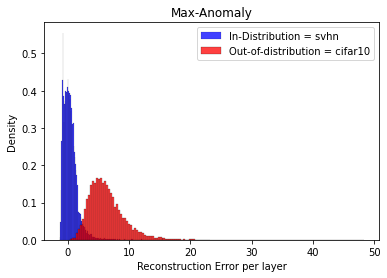

In [9]:
ood_index= 0
print(ood_dataset[ood_index])
rst,_,_ = callog.metric(ind_scaled_max,ood_scaled_max[ood_index])
print(rst)
print("{:.1f} / {:.1f} / {:.1f}".format(100*rst['TMP']['TNR'],100*rst['TMP']['AUROC'],100*rst['TMP']['DTACC']))
sns.histplot(data=-ind_scaled_max,color='blue',stat='density')
sns.histplot(data=-ood_scaled_max[ood_index],color='red',stat='density')
plt.legend(['In-Distribution = {}'.format(ind_dataset),'Out-of-distribution = {}'.format(ood_dataset[ood_index])])
plt.title('Max-Anomaly')
plt.xlabel('Reconstruction Error per layer')